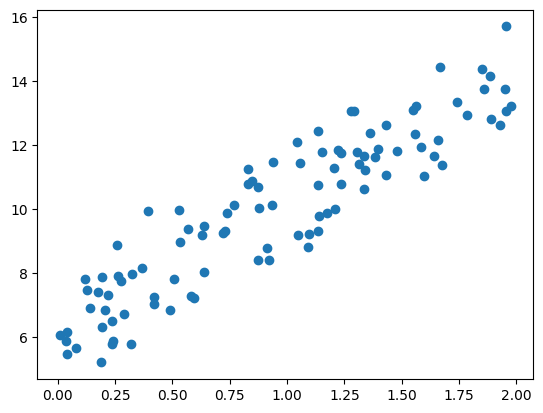

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)
plt.scatter(X,y)

In [2]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred
    w0_factors=np.ones((N,1))

    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update

def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        print(f"w1: {w1},w0:{w0}")
    return w1,w0

def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost



In [3]:
w1,w0=gradient_descent_steps(X,y,iters=1000)
print(f"w1:{w1[0,0]},w0:{w0[0,0]}")
y_pred=w1[0,0]*X+w0
print(f"Gradient Descent Total Cost: {get_cost(y,y_pred)}")

w1: [[0.21502681]],w0:[[0.1994937]]
w1: [[0.42100578]],w0:[[0.39093099]]
w1: [[0.61831123]],w0:[[0.57464412]]
w1: [[0.80730201]],w0:[[0.75095159]]
w1: [[0.98832217]],w0:[[0.92015876]]
w1: [[1.1617015]],w0:[[1.08255838]]
w1: [[1.32775621]],w0:[[1.2384311]]
w1: [[1.48678941]],w0:[[1.38804598]]
w1: [[1.6390917]],w0:[[1.53166097]]
w1: [[1.78494168]],w0:[[1.66952335]]
w1: [[1.92460643]],w0:[[1.80187021]]
w1: [[2.05834199]],w0:[[1.92892882]]
w1: [[2.18639383]],w0:[[2.05091709]]
w1: [[2.30899728]],w0:[[2.16804391]]
w1: [[2.42637792]],w0:[[2.28050955]]
w1: [[2.53875204]],w0:[[2.38850599]]
w1: [[2.64632698]],w0:[[2.49221732]]
w1: [[2.74930151]],w0:[[2.59181999]]
w1: [[2.8478662]],w0:[[2.68748318]]
w1: [[2.94220372]],w0:[[2.77936908]]
w1: [[3.03248922]],w0:[[2.86763316]]
w1: [[3.11889059]],w0:[[2.95242451]]
w1: [[3.2015688]],w0:[[3.03388603]]
w1: [[3.28067816]],w0:[[3.11215473]]
w1: [[3.35636659]],w0:[[3.18736196]]
w1: [[3.42877592]],w0:[[3.25963365]]
w1: [[3.49804211]],w0:[[3.32909051]]
w1: [[3

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, )

[67.30998637]


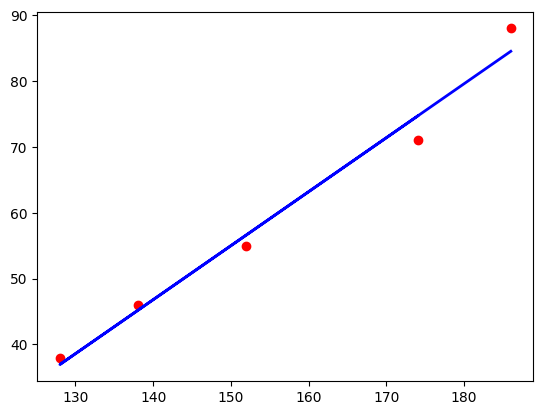

In [7]:
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = [[174],[152],[138],[128],[186]]
y = [71,55,46,38,88]
reg.fit(X, y)

print(reg.predict([[165]]))

plt.scatter(X, y, color='red')

y_pred = reg.predict(X)

plt.plot(X, y_pred, color='blue', linewidth=2)
plt.show()

In [9]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
model.coef_

array([ -35.55025079, -243.16508959,  562.76234744,  305.46348218,
       -662.70290089,  324.20738537,   24.74879489,  170.3249615 ,
        731.63743545,   43.0309307 ])

## LinearRegression 보스턴 주택가격 예측

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [28]:
housing = pd.read_csv('datasets/housing.csv', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], sep='\s+')
#housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [30]:
features = housing.drop('MEDV', axis=1)
label = housing['MEDV'] # 집값
corr = housing.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

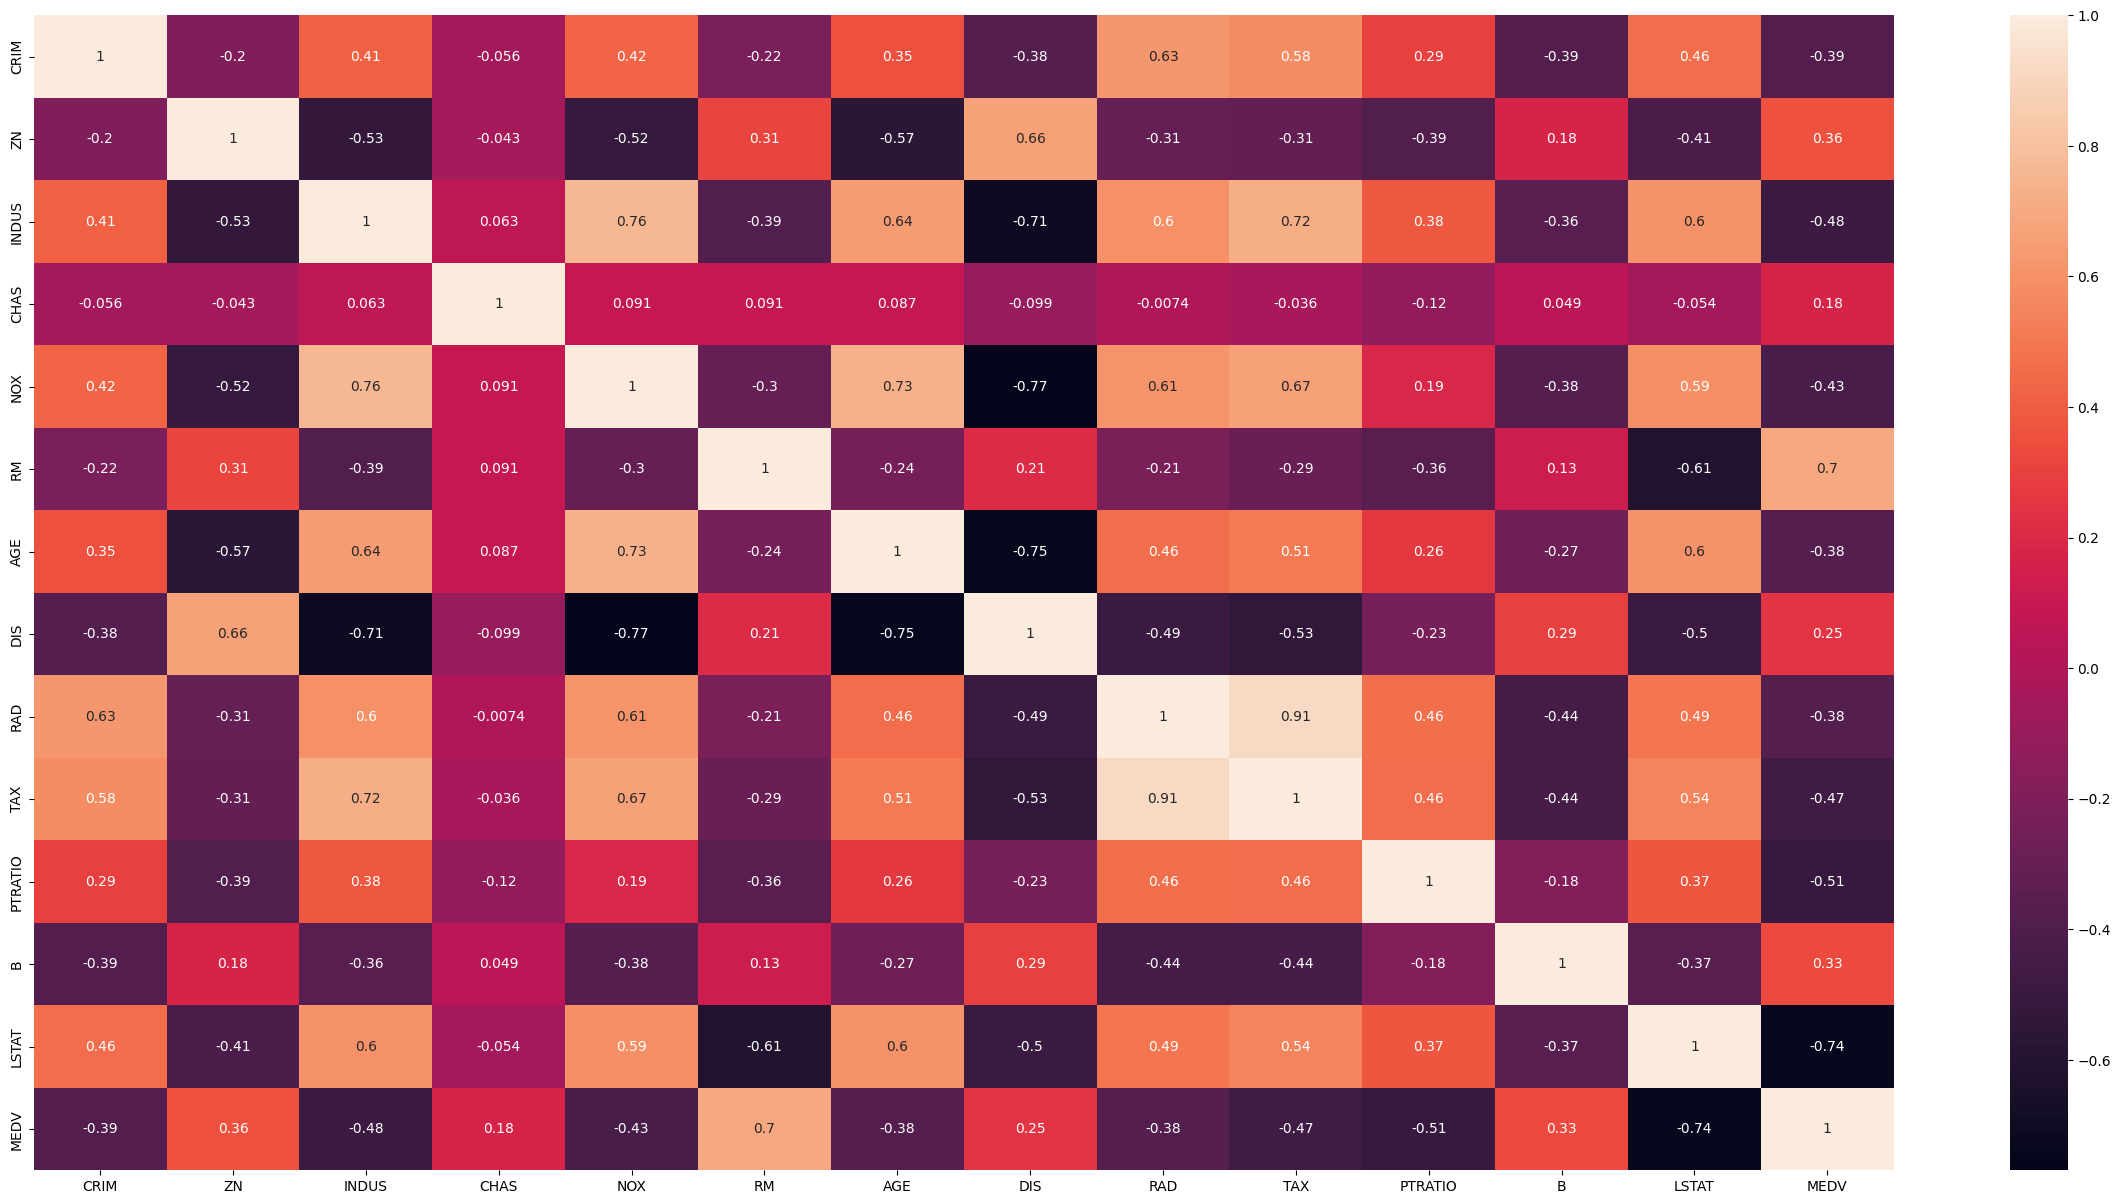

In [32]:
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True)

In [35]:
from patsy import dmatrices
import seaborn as sns

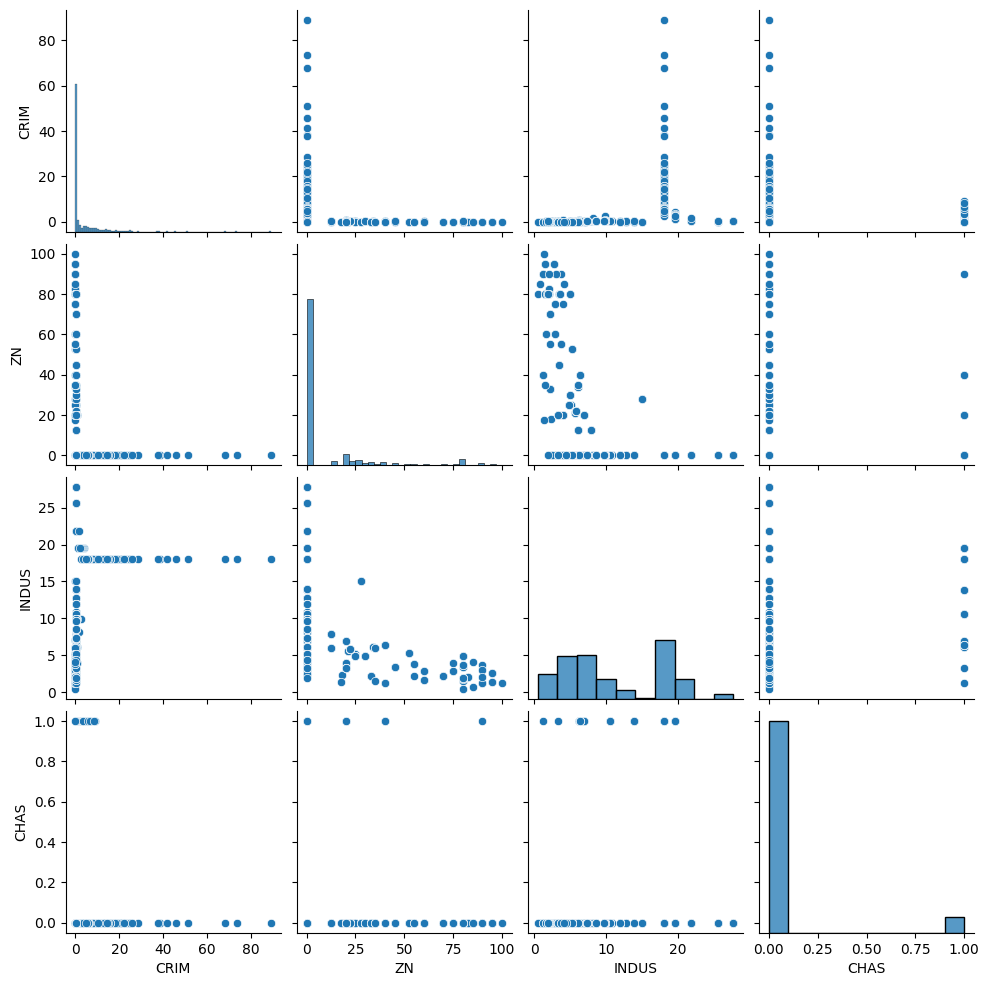

In [41]:
sns.pairplot(features[['CRIM', 'ZN', 'INDUS', 'CHAS']])

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + MEDV', housing, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif


,VIF Factor,features
0,645.977937,Intercept
1,1.831537,CRIM
2,2.352186,ZN
3,3.992503,INDUS
4,1.095223,CHAS
5,4.586920,NOX
6,2.260374,RM
7,3.100843,AGE
8,4.396007,DIS
9,7.808198,RAD


In [45]:
housing = housing.drop(columns=['TAX','RAD'])
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,22.0


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


